In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [16]:
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
dir=r"D:\horse-or-human"
train_data=data_gen.flow_from_directory(dir,subset='training',batch_size=32,target_size=(150,150),class_mode='binary')
test_data=data_gen.flow_from_directory(dir,subset='validation',batch_size=32,target_size=(150,150),class_mode='binary',shuffle=False)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [12]:
def create_model(base_model,lr=0.001):
    model=Sequential([base_model,
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dense(1,activation='sigmoid')])
    model.compile(optimizer=Adam(learning_rate=lr),metrics=['accuracy'],loss='binary_crossentropy')
    return model

In [22]:
model=Sequential([    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                      MaxPooling2D((2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      MaxPooling2D((2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dense(1,activation='sigmoid')])
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['accuracy'],loss='binary_crossentropy')

c:\Users\deepe\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history=model.fit(train_data,batch_size=64,epochs=3,validation_data=test_data)

Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 836ms/step - accuracy: 0.5862 - loss: 1.1830 - val_accuracy: 0.7659 - val_loss: 0.3874
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 774ms/step - accuracy: 0.9241 - loss: 0.1711 - val_accuracy: 0.8439 - val_loss: 0.4578
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 732ms/step - accuracy: 0.9745 - loss: 0.0662 - val_accuracy: 0.9220 - val_loss: 0.1366


In [19]:
resnet50=ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))
resnet50.trainable=False
resnet50=create_model(resnet50)

In [ ]:

vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
vgg16.trainable=False
vgg16=create_model(resnet50)


In [ ]:
history_vgg16=vgg16.fit(train_data,batch_size=64,epochs=3,validation_data=test_data)


c:\Users\deepe\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.4839 - loss: 0.6938 - val_accuracy: 0.5122 - val_loss: 0.6929
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5247 - loss: 0.6926 - val_accuracy: 0.5122 - val_loss: 0.6929
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.5122 - val_loss: 0.6929
Epoch 1/3


AttributeError: 'NoneType' object has no attribute 'update_state'

In [20]:
history_resnet=resnet50.fit(train_data,batch_size=64,epochs=3,validation_data=test_data)

Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.5291 - loss: 1.7313 - val_accuracy: 0.4878 - val_loss: 0.7825
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.6328 - loss: 0.6048 - val_accuracy: 0.6829 - val_loss: 0.5922
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7712 - loss: 0.5174 - val_accuracy: 0.5122 - val_loss: 0.6058


In [24]:
test_loss,test_acc=vgg16.evaluate(test_data)
test_loss,test_acc

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2622 - loss: 0.7020


(0.6928681135177612, 0.5121951103210449)

In [25]:
test_loss,test_acc=resnet50.evaluate(test_data)
test_loss,test_acc

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7437 - loss: 0.4375


(0.6058282852172852, 0.5121951103210449)

In [27]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 6.5 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 7.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 7.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 7.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
ypred=(resnet50.predict(test_data)>0.5).astype("int32")
true=test_data.classes
print(classification_report(ypred,true))
print(confusion_matrix(ypred,true))

ypred=(vgg16.predict(test_data)>0.5).astype("int32")
true=test_data.classes
print(classification_report(ypred,true))
print(confusion_matrix(ypred,true))

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step
              precision    recall  f1-score   support

           0       0.99      0.50      0.66       198
           1       0.06      0.86      0.11         7

    accuracy                           0.51       205
   macro avg       0.52      0.68      0.39       205
weighted avg       0.96      0.51      0.65       205

[[99 99]
 [ 1  6]]
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.68       205

    accuracy                           0.51       205
   macro avg       0.50      0.26      0.34       205
weighted avg       1.00      0.51      0.68       205

[[  0   0]
 [100 105]]


c:\Users\deepe\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deepe\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deepe\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
ypred=(model.predict(test_data)>0.5).astype("int32")
true=test_data.classes
print(classification_report(ypred,true))
print(confusion_matrix(ypred,true))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       114
           1       0.86      0.99      0.92        91

    accuracy                           0.92       205
   macro avg       0.92      0.93      0.92       205
weighted avg       0.93      0.92      0.92       205

[[99 15]
 [ 1 90]]


In [31]:
import torch
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)

# Load model, processor, and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

def generate_caption(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

    # Generate caption
    caption_ids = model.generate(pixel_values, max_length=16, num_beams=4)
    caption = tokenizer.decode(caption_ids[0], skip_special_tokens=True)
    return caption

# Generate caption for a test image
test_image_path = r"C:\Users\deepe\Downloads\img.jpg"
print("Generated Caption:", generate_caption(test_image_path))

c:\Users\deepe\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generated Caption: a tall clock tower towering over a city 


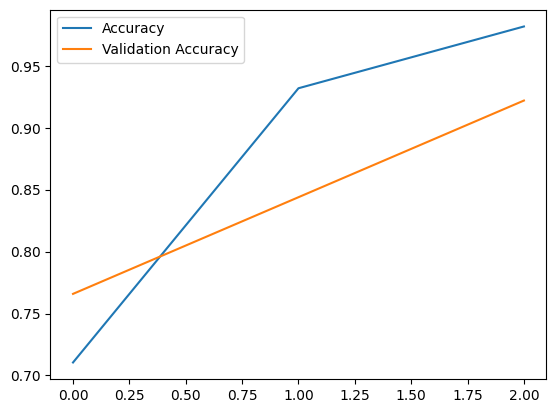

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

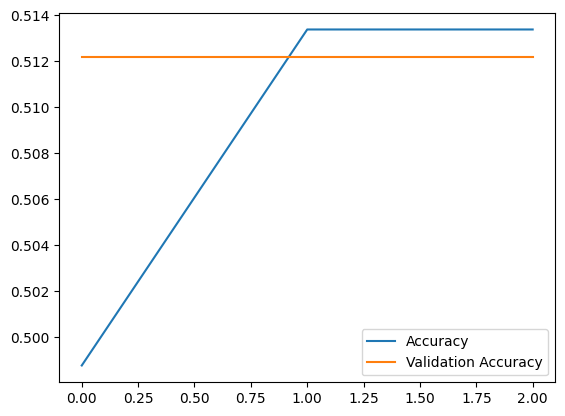

In [33]:
import matplotlib.pyplot as plt
plt.plot(history_vgg16.history['accuracy'],label="Accuracy")
plt.plot(history_vgg16.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

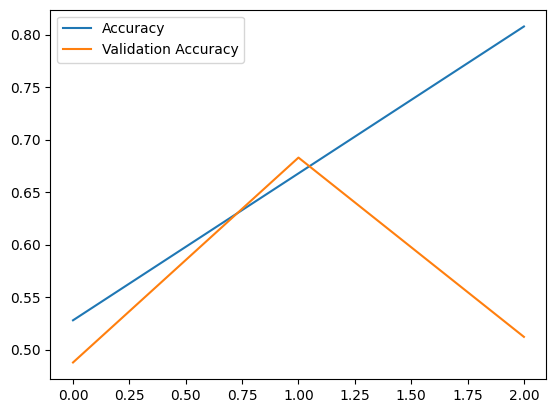

In [34]:
import matplotlib.pyplot as plt
plt.plot(history_resnet.history['accuracy'],label="Accuracy")
plt.plot(history_resnet.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [36]:
import tensorflow as tf

In [53]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [54]:
x_train=x_train/255.0
x_test=x_test/255.0

In [55]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [56]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

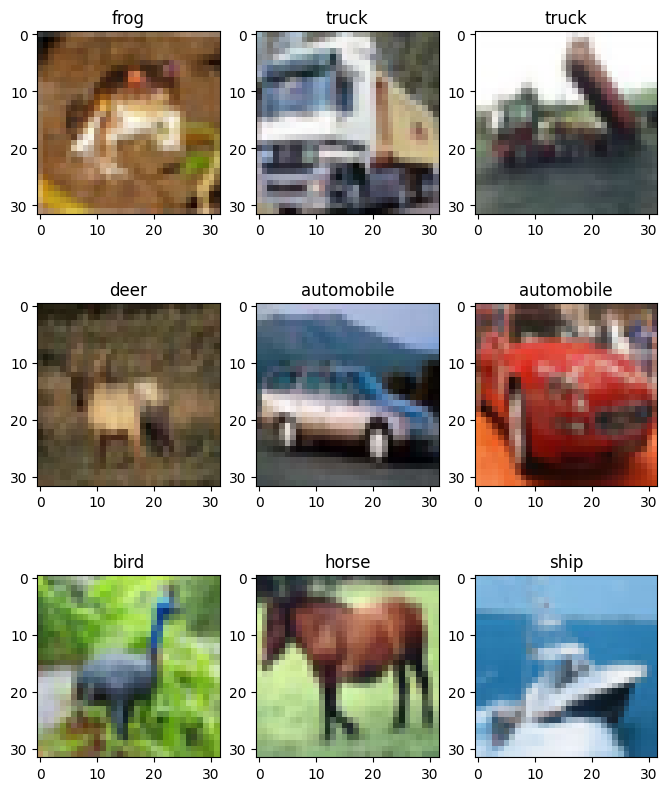

In [57]:
plt.figure(figsize=(8,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    

In [58]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [65]:
model=Sequential([    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                      MaxPooling2D((2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      MaxPooling2D((2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dense(10,activation='softmax')])
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['accuracy'],loss='categorical_crossentropy')
model.compile()

In [66]:
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.3159 - loss: 1.8672 - val_accuracy: 0.4600 - val_loss: 1.4937
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5484 - loss: 1.2815 - val_accuracy: 0.5674 - val_loss: 1.2039
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6322 - loss: 1.0550 - val_accuracy: 0.5732 - val_loss: 1.2588
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6784 - loss: 0.9259 - val_accuracy: 0.6400 - val_loss: 1.0383
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7143 - loss: 0.8276 - val_accuracy: 0.6509 - val_loss: 1.0180
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7391 - loss: 0.7505 - val_accuracy: 0.6678 - val_loss: 1.0105
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.7632 - loss: 0.6740 - val_accuracy: 0.6820 - val_loss: 0.9651
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7833 - loss: 0.6217 - 

In [91]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
import matplotlib.pyplot as plt

In [92]:
model=VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

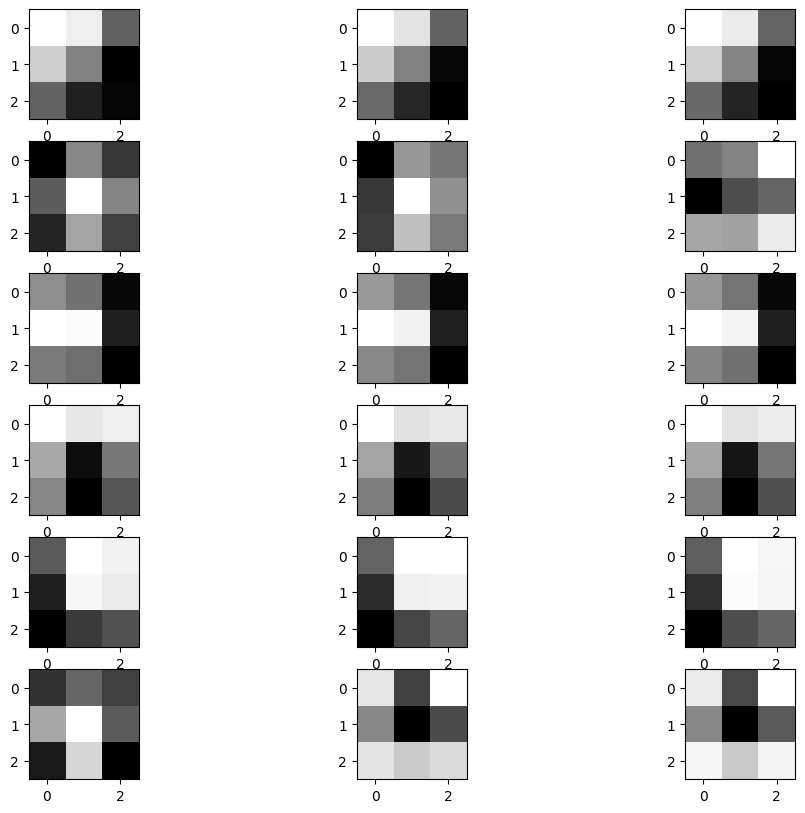

In [97]:
filters,bias=model.layers[1].get_weights()
fmax,fmin=filters.max(),filters.min()
filters=(filters-fmin)/(fmax-fmin)
plt.figure(figsize=(12,10))
n=6
ix=1
for i in range(n):
    f=filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n,3,ix)
        plt.imshow(f[:,:,j],cmap="gray")
        ix+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


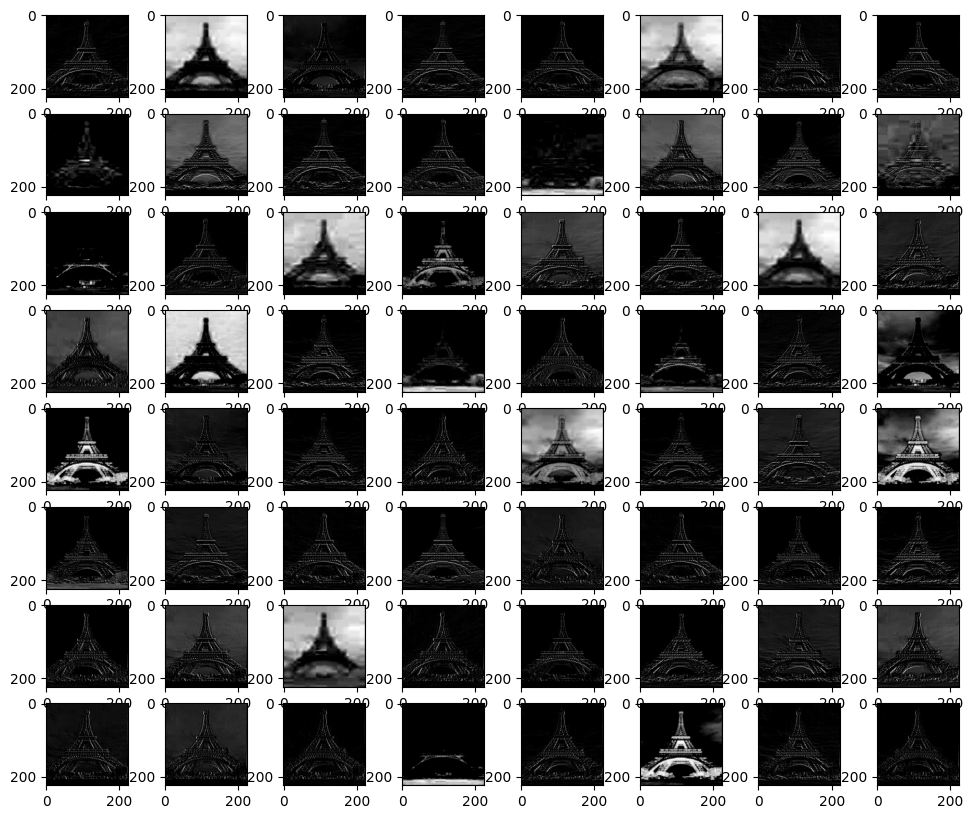

In [106]:
from tensorflow.keras.models import Model
model=Model(inputs=model.inputs,outputs=model.layers[1].output)
img=load_img(r"C:\Users\deepe\Downloads\img.jpg",target_size=(224,224))
img=img_to_array(img)
img=expand_dims(img,axis=0)
img=preprocess_input(img)
features=model.predict(img)
plt.figure(figsize=(12,10))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1],cmap="gray")